In [3]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 23.8 MB/s eta 0:00:00


In [4]:
import numpy as np
import sklearn as skl
import scipy as scpy
import matplotlib as plot
import ipython_genutils._version as ipython
import pandas as panda
import mglearn as mg

In [5]:
print("NumPy Version"+np.__version__)
print("Sklearn Version"+skl.__version__)
print("Scipy Version"+scpy.__version__)
print("Matplotlib Version"+plot.__version__)
print("Ipython Version"+ipython.__version__)
print("Pandas Version"+panda.__version__)
print("Mglearn Version"+mg.__version__)


NumPy Version1.26.4
Sklearn Version1.2.2
Scipy Version1.13.1
Matplotlib Version3.7.5
Ipython Version0.2.0
Pandas Version2.2.3
Mglearn Version0.1.9


In [6]:
from sklearn.datasets import load_breast_cancer
data_breast_cancer = load_breast_cancer()

In [7]:
print("Target names:\n:",data_breast_cancer['target_names'])

print("Shape of data:",data_breast_cancer['data'].shape)

Target names:
: ['malignant' 'benign']
Shape of data: (569, 30)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data_breast_cancer['data'], data_breast_cancer['target'], random_state=0)

print("X_train shape ",format(X_train.shape))
print("Y_train shape ",format(y_train.shape))

print("X_test shape ",format(X_test.shape))
print("Y_test shape ",format(y_test.shape))


X_train shape  (426, 30)
Y_train shape  (426,)
X_test shape  (143, 30)
Y_test shape  (143,)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Loop through different values of n_neighbors
for n in range(1, 7):  # n from 1 to 6
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"n_neighbors = {n}: Accuracy = {accuracy:.7f}")


n_neighbors = 1: Accuracy = 0.9160839
n_neighbors = 2: Accuracy = 0.9020979
n_neighbors = 3: Accuracy = 0.9230769
n_neighbors = 4: Accuracy = 0.9230769
n_neighbors = 5: Accuracy = 0.9370629
n_neighbors = 6: Accuracy = 0.9230769


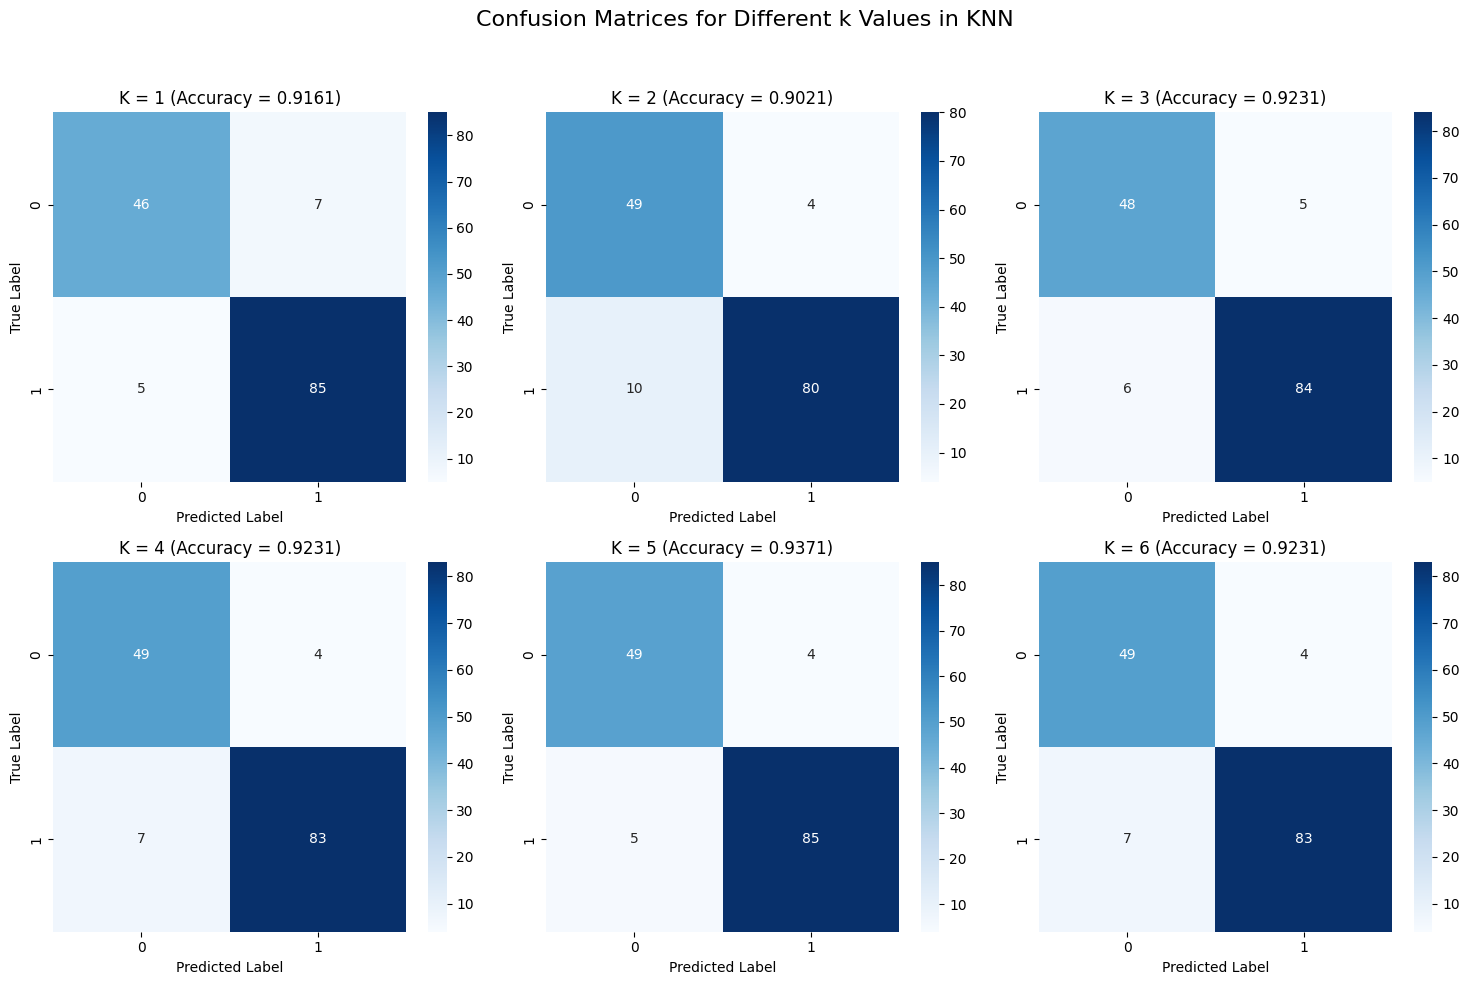

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Define the number of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  
fig.suptitle("Confusion Matrices for Different k Values in KNN", fontsize=16)

# Loop through different values of k (from 1 to 6)
for i, k in enumerate(range(1, 7)):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Plot confusion matrix
    ax = axes[i // 3, i % 3]  # Select subplot
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"K = {k} (Accuracy = {accuracy:.4f})")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**SVM**

In [18]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
#load dataset
data_breast_cancer = load_breast_cancer()
X = data_breast_cancer.data  # Features
y = data_breast_cancer.target  # Labels (0 = Malignant, 1 = Benign)


In [20]:
#Divide the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#train the SVM model
svm_model = SVC(kernel='linear', C=1.0)  # Using linear kernel
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
#perform predictions
y_pred = svm_model.predict(X_test)

Accuracy: 0.9561


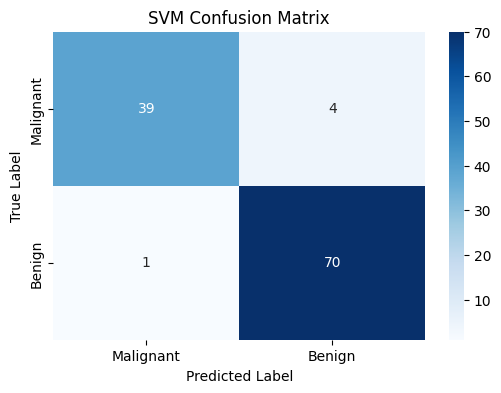

In [25]:
#output accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM Confusion Matrix")
plt.show()

In [26]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load dataset
data_breast_cancer = load_breast_cancer()

# Convert to pandas DataFrame
df = pd.DataFrame(data_breast_cancer.data, columns=data_breast_cancer.feature_names)

# Add target column
df['target'] = data_breast_cancer.target

# Print first 5 rows
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             